# Theoretischer Hintergrund

### Einführung

Visualisierung ist ein fundamentaler Aspekt von Data Science, welcher es erlaubt verständlicher und effizienter die Befunde aus Datenanalysen mitzuteilen. Diese Befunde können dazu beitragen Unternehmensentscheidungen zu unterstützen [BOS15]. Dabei kann es schwierig sein die richtige Bibliothek auszuwählen für die Visualisierungsaufgaben. Eine weitere Herausforderung besteht darin einen geeigneten Diagrammtyp zu finden um seine befunde darzustellen [HEN11].


Die 7 Success-Regeln nach Hichert sind eine gute Richtline für Visualisierungsaufgaben und können zusätzlich helfen den richtigen Diagramtyp zu wählen. [7-Success-Regeln](http://www.controlling-strategy.com/hichert-success-regeln.html).

Dieses Notebook stellt zwei Bibliotheken zur Visualisierung von Daten vor. Zum einen `Matplotlib` und zum anderen `Seaborn`.
Beide Bibliotheken bieten eine vielzahl von Methoden und Parametern, die sehr ähnlich sind. Sie unterscheiden sich in der visuellen Darstellung und in der Schwierigkeit die Plots auf seine Bedürfnisse anzupassen. So macht es Seaborn z. B. einfacher bestimmte Dinge in Plots darzustellen, da zusätzliche Methoden und Parameter existieren.
Ziel ist es die erweiterten Plotmöglichkeiten von `Seaborn` zu zeigen mit Bezug auf `Matplotlib`. Dabei sollte `Seaborn` als Ergänzung zu `Matplotlib` betrachtet werden und nicht als konkurrierende Bibliothek. Weiteres Augenmerk in diesem Notebook liegt auf der Anpassung von Plots durch Parameter in den Funktionen.

### Historie von Matplotlib und Seaborn


#### Matplotlib

John Hunter ist ein Data Scientist und Python Entwickler, der [Elektroenzephalografie](https://de.wikipedia.org/wiki/Elektroenzephalografie) Analysen mit dem Programm [MATLAB](https://de.mathworks.com/products/matlab.html) betreibt. Mit steigender Komplexität musste er mit Datenbanken und https servern interagieren und komplexe Datenstrukturen manipulieren, was an die grenzen von MATLAB stieß. Da beschloss er Python zu verwenden und seine eigene Bibliothek für 2D Plots zu schreiben. Zu diesem Zeitpunkt gab es keine Bibliothek, die seine Anforderungen abdeckte. Die Anforderungen waren unter anderem:


- Plots sollten gut aussehen und Publikationsqualität aufweisen. Die Beschriftung sollte gut aussehen ([antialiased](https://de.wikipedia.org/wiki/Antialiasing_(Computergrafik) etc.)
- Die Bibliothek sollte über Integrationsmöglichkeiten in eine GUI verfügen für Applikationsentwicklungen
- Der Code sollte einfach zu verstehen und zu erweitern sein
- Plots zu zeichnen sollte mit Hilfe von wenigen Zeilen möglich sein

[HUN17]

#### Seaborn

`Seaborn` baut auf der Bibliothek `Matplotlib` auf und kann als Erweiterung von `Matplotlib` betrachtet werden. `Seaborn` bietet support für `numpy` und `pandas` Datenstrukturen und statistische Verfahren von den Bibliotheken `scipy` und `statsmodels`. `Seaborn` erlaubt es Grafiken visuell attraktiv zu gestalten mit dem Leitspruch: "Wenn `matplotlib` versucht einfache Dinge einfacher zu machen und schwierige Dinge möglich, versucht `seaborn` eine Sammlung von schiwerigen Dingen einfach zu machen."

Weil `Matplotlib` von `Seaborn` benutzt wird können tools von `Matplotlib` verwendet werden um plots anzupassen. `Seaborn` sollte als Ergänzung zu `Matplotlib` angesehen werden, nicht als Ersatz. Eine vollumfängliche Anpassung der Plots in `Seaborn` verlangt daher ein fortgeschrittenes Verständnis der `Matplotlib` Objekte.
[WAS15]

`Matplotlib` ist eine nützliche Bibliothek aber sie lässt noch einige Wünsche aus. Es gibt berechtigte Einwände zu Matplotlib, die des öfteren Erwähnt werden:

- Matplotlib's default Einstellung sind nicht unbedingt die modernste Wahl. Vieles basiert auf dem Design von MATLAB aus dem Jahre 1999
- Ausgeklügelte statistische Visualisierungen sind möglich mit Matplotlib, jedoch wird viel zusätzlicher Code benötigt, wenn default Einstellungen nicht mehr ausreichen.
- Matplotlib ist nicht entworfen worden für die Nutzung mit Pandas dataframes. Um Daten aus Pandas dataframes zu visualiseren müssen jeweils Serien extrahiert und oftmals miteinander im richtigen Format verbunden werden.

`Seaborn` addressiert diese Punkte und bietet vernünftige Plots und Farben als default Einstellung. `Seaborn` benutzt simple Funktionen für gängige statistische Plotarten, die gut zusammenarbeiten mit Funktionen von Pandas dataframes.
[VAN15]

### Einordnung von Visualiserungsaufgaben in den CRISP-DM Prozess

CRISP-DM steht für **CR**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining. 

![STA1](CRISP-DM_Process_Diagram1.png "CRISP_DM Prozess-Modell")

Es handelt sich dabei um ein Branchenübergreifendes Prozess-Modell, welches den Data Mining Prozess in 6 Phasen unterteilt.


- Business Understanding (Geschäftsverständnis): Festlegung der Ziele und Anforderungen; Ableitung der konkreten Aufgabenstellung und der groben Vorgehensweise
- Data Understanding (Datenverständnis): Datensammlung bzw. erste Sichtung der zur Verfügung stehenden Daten; Ermittlung möglicher Probleme mit Datenqualität
- Data Preparation (Datenvorbereitung): Konstruktion des finalen Datensatzes für die Modellierung
- Modeling (Modellierung): Anwendung geeigneter Data Mining-Verfahren, Optimierung der Parameter; gewöhnlich Ermittlung mehrerer Modelle
- Evaluation (Evaluierung): Auswahl des Modells, das die Aufgabenstellung am besten erfüllt. Sorgfältiger Abgleich mit der Aufgabenstellung.
- Deployment (Bereitstellung): Aufbereitung und Präsentation der Ergebnisse; evtl. Integration des Modells in einen Entscheidungsprozess des Auftraggebers

Dabei setzt die Visualisierung bzw. das Reporting auf den Ergebnissen der Datenalayse und Evaluation auf und ist im Schaubild im Schritt "Deployment" eingeordnet. In dieser Phase spielt nicht nur das visualisieren eine Rolle sondern auch die Verteilung der visualisierten Informationen an die Empfänger.
[STA2]

# Praktischer Hintergrund

In den folgenden vier Beispielen sollen gleichartige Funktion gegenübergestellt werden.

### Import von Matplotlib und allgemein benötigten Bibliotheken

In [1]:
#from __future__ import print_function, division
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Methode definieren die von Matplotlib und danach von Seaborn aufgerufen wird

Beispiele entnommen aus: https://seaborn.pydata.org/tutorial/aesthetics.html

In [2]:
def sinplot(offset):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * offset)

### Verschobene Sinuskurven mit Matplotlib Plotten

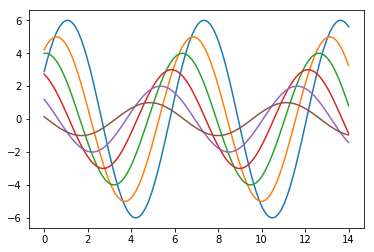

In [3]:
sinplot(offset = 1)

### Der gleiche Plot mit Seaborn


**Hinweis:** Beim Ausführen des `plot` Befehls nachdem die Methode `seaborn.set()` aufgerufen wurde verleiht es dem Plot eine moderner wirkende Oberfläche. Unter der "Haube" von `Seaborn` werden teilweise `Matplotlib` Funktionen aufgerufen.

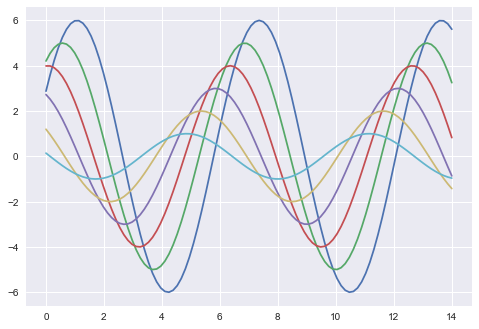

In [4]:
import seaborn as sns
#setzen der Seaborn default Einstellungen
sns.set()
sinplot(offset = 1)

### Methoden definition für die nächsten Beispiele

In [5]:
#size bekommt einen Default Wert

def createdata(size = None):
    mean = [0, 0]
    cov = [[5, 2], [2, 2]]
    if (size is None):
        # Mehrdimensionale Normalverteilung hier mit zwei Dimensionen
        # Erster Parameter der multivariate_normal Methode ist der 'mean' eine Koordinate im N-dimensionalen Raum, 
        # welche den Ort bestimmt an dem Beobachtungen am wahrscheinlichsten sind. Dies ist analog zur Spitze der Gaußschen 
        # Glockenkurve im Eindimensionalen Raum.
        # Zweiter Parameter bestimmt die zugehörige Kovarianzmatrix
        # Dritter Parameter gibt die Beobachtungsanzahl an
        data = np.random.multivariate_normal(mean, cov, size=2000)
        data = pd.DataFrame(data, columns=['x', 'y'])
    else:
        data = np.random.multivariate_normal(mean, cov, size=size)
        data = pd.DataFrame(data, columns=['x', 'y'])
    return data

In [6]:
def histogram():
    data = createdata()

    #Achsen definieren
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    for col in data:
        #Serien (Spalten) werden benötigt als erster Parameter für die Methode plt.hist
        #Zweiter Parameter normed = True sorgt dafür, dass die relativen Häufigkeiten gezeigt werden (Prozent)
        #Dritter Parameter alpha=0.5 beschreibt die Durchsichtigkeit der Daten bei übereinander gelegten Plots
        plt.hist(data[col], normed=True, alpha=0.5)

### Seaborn: Histogramm mit default Einstellungen


Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung von beobachteten Daten und wird häufig in der Statistik gebraucht. Dabei werden die Daten in Klassen eingeteilt (x-Achse) und ihre Häufigkeit (relativ oder absolut) wird über die y-Achse dargestellt. 

Mit der Methode `seaborn.set()` werden die default Einstellungen von Matplotlib mit denen von Seaborn ersetzt.

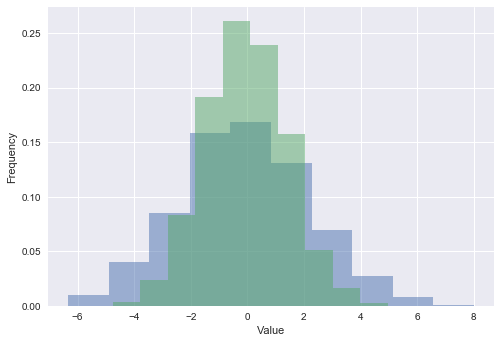

In [7]:
sns.set()
histogram()

### Matplotlib: Histogramm zum Vergleich

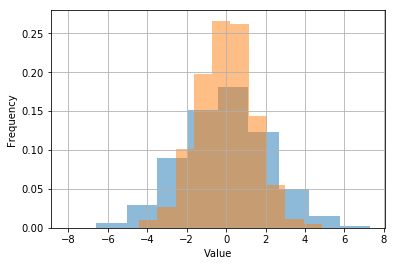

In [8]:
#durch folgenden Befehl können Seaborn default Enstellungen rückgängig gemacht werden für den plot Befehl
sns.reset_orig() 
histogram()
#manuelles Hinzufügen des Gitternetzes im Hintergrund nötig:
ax = plt.gca()
ax.grid(True)

### Seaborn: Interpolation von Histogrammen

Zusätzlich werden folgende Parameteranpassungen vorgenommen:

- Setzen der Achsenbezeichnungen
- Füllfarbe unterhalb des Kurvenverlaufs
- Entfernung von Rändern und parallele Verschiebung der Achsen

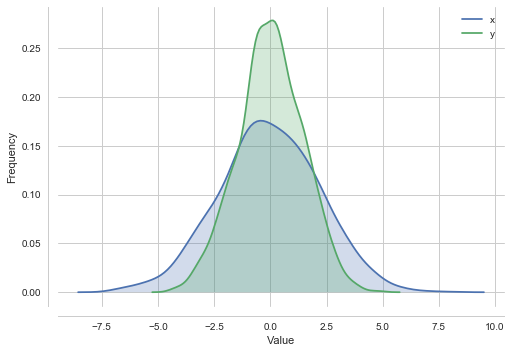

In [9]:
sns.set()

#Daten holen
data = createdata()

#Änderung des Hintergrundraster
sns.set_style("whitegrid")

plt.xlabel("Value")
plt.ylabel("Frequency")
    
for col in data:
     sns.kdeplot(data[col], shade=True)

#Verschiebung der Achsen weg vom Schaubild zusätzlich werden der obere und rechte Rand entfernt
#Alternativ können nur einzelne Ränder entfernt werden je nach Parameterübergabe in despine()' z. B. bottom = True
sns.despine(offset=10);

### Seaborn: Histogramme mit einer Interpolation verbinden mit einen Methodenaufruf

Hier würde Matplotlib mehr als einen Methodenaufruf benötigen. Des weiteren werden Kontexteinstellungen vorgenommen

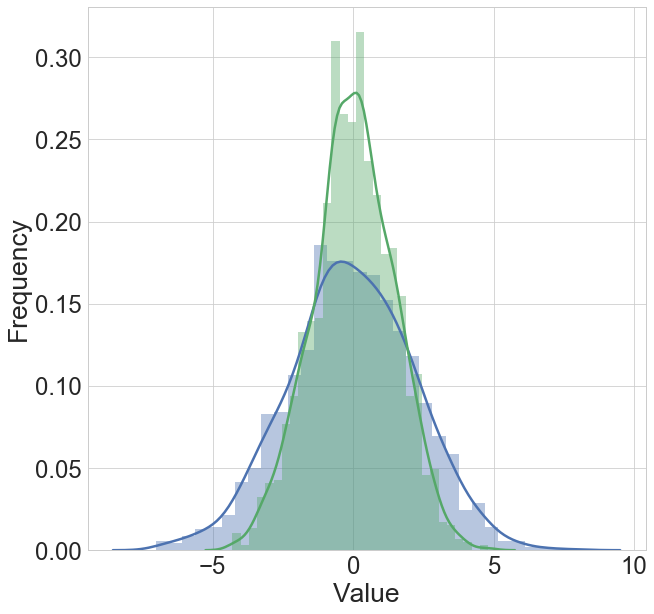

In [10]:
#Setzen des Kontexts für z.B. Veröffentlichung = "paper". font_scale gibt die Schriftgröße an. Der rc Parameter steht für 
#die Dicke der Linien
sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 2.5})
# Anpassung der Plotgröße
plt.figure(figsize=(10, 10))

for col in data:
    sns.distplot(data[col]);

plt.ylabel("Frequency");
plt.xlabel("Value");

### Hexbin als Alternative zu einem 2D Histogramm bzw. Scatterplot

Die Datenstrutkur des numpy Arrays wird von oben betrachtet. X und Y Werte werden in das Koordinatensystem eingetragen. Wie zu erwarten sind um und in den zentralen Punkt = 'mean' die häufigsten Beobachtungen. Je häufiger Beobachtungen innerhalb eines Sechsecks (= Hexbin) vorkommen desto dunkler sind die Stellen.


http://seaborn.pydata.org/tutorial/distributions.html

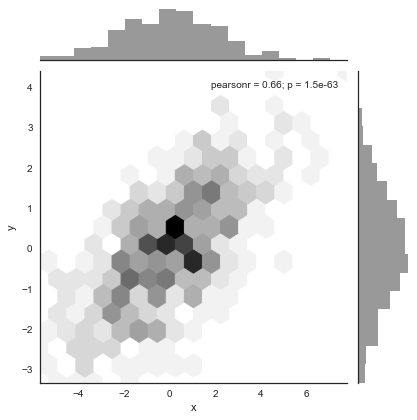

In [11]:
#default Einstellung wiederherstlelen
sns.reset_orig() 
sns.set()


#Der size Parameter überschreibt den Default Parameter
data = createdata(size= 500)
with sns.axes_style("white"):
    #Methode gibt es in Matplotlib daher werden Serien gebraucht als Parameter
    sns.jointplot(data.x,data.y, kind="hex", color="k");

### 2D Visualisierung der Daten mittels 2D Kerndichteschätzung und DataFrame ohne Series

Weitere Features:

- Subplots mit Matplotlib
- Verschiedene Gitter mit Seaborn
- Anpassung der Plotgröße
- Anpassung von Kontext und Schriftgröße
- Farblicher Überlauf 
- Anpassung der Farben mit linearer Steigung in Helligkeit und Farbton mittels cubehelix Farbpalette dadurch bleiben die farblichen Abhebungen erhalten wenn der Plot in Schwarz/Weiß gedruckt wird


Für weiter Informationen zur Kerndichteschätzung siehe [Multivariate Kerndichteschätzung](https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation)

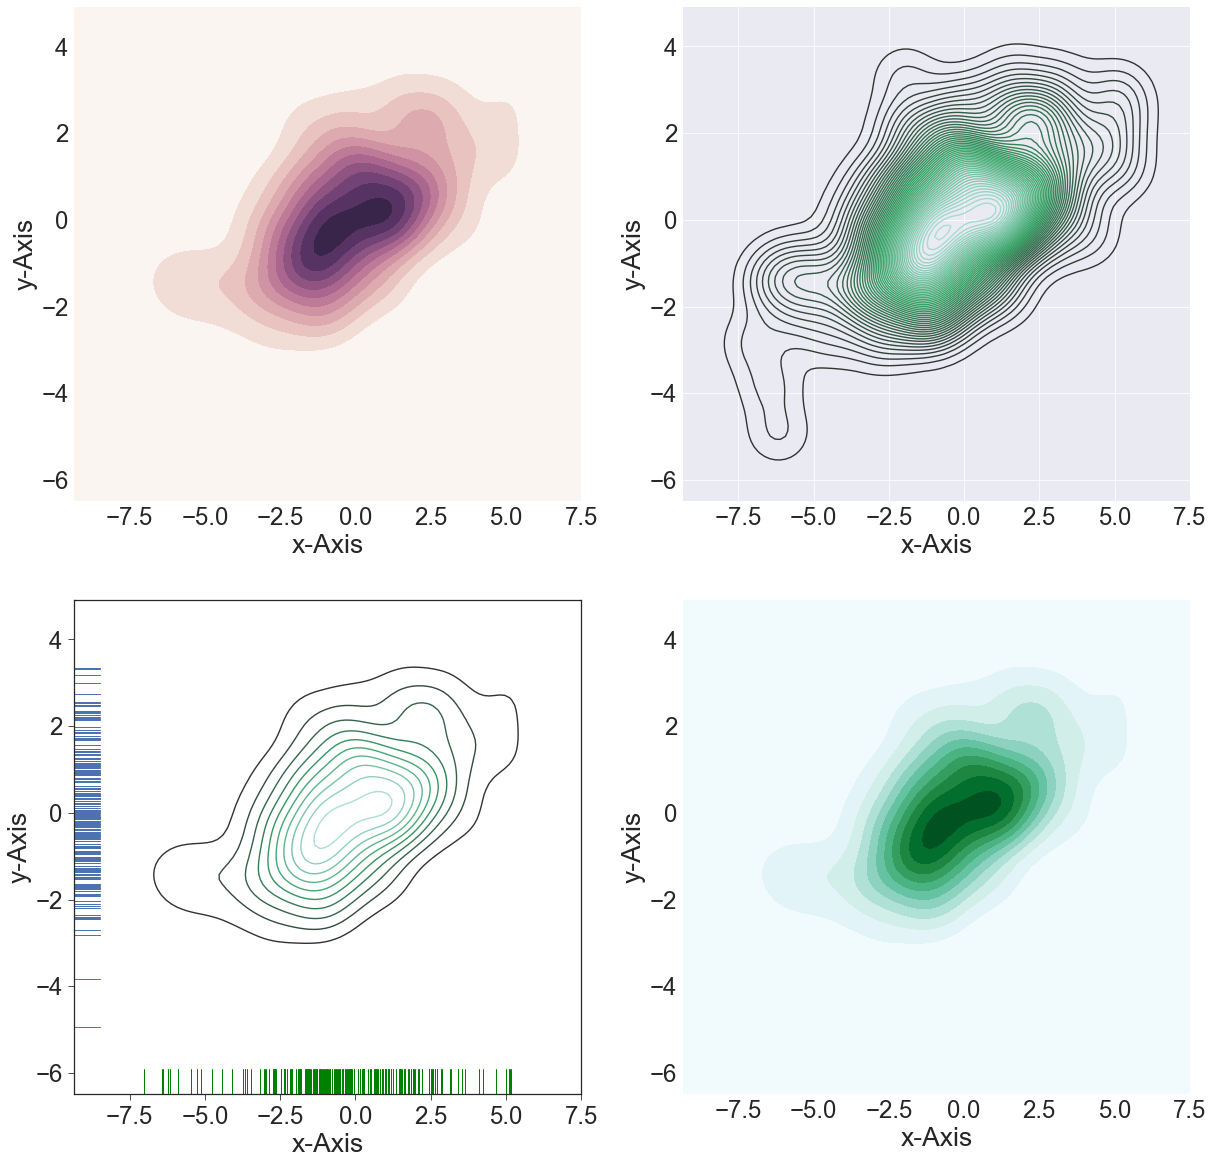

In [12]:
# Kontext und Schriftgröße ändern
sns.set_context("paper", font_scale=3)
# Anpassung der Plotgröße
plt.figure(figsize=(20, 20))


#Farbpalette einstellen und in Variable speichern
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

#Daten erstellen
data = createdata(size=200)


#mit dem with Befehel in Verbindung mit sns.axes_style können temporär die Hintergrund Styles gewechselt werden
with sns.axes_style("darkgrid"):
    
    #Übergabeparameter für subplot: (Zeilen, Spalten, Plot Nummer) = 1,1,1 ist default
    #Die Spalten und Zeilen werden festgelegt, danach bestimmt die Plot Nummer wohin das Bild in das Gitter kommt
    plt.subplot(2,2,1)
    #shade=True für Farblichen Überlauf, cmap für Farbpalette
    sns.kdeplot(data, shade=True, cmap = cmap );
    plt.xlabel("x-Axis");
    plt.ylabel("y-Axis");


#Plot mit Standard Hintergrundgitter und erhöhter Anzahl von Kontourebenen
plt.subplot(2,2,2)
sns.kdeplot(data, n_levels=60);
plt.xlabel("x-Axis");
plt.ylabel("y-Axis");

#Plot ohne Gitter in weiß
with sns.axes_style("ticks"):
    plt.subplot(2,2,3)
    sns.kdeplot(data);
    
    #Mittels Rugplot werden die Beobachtungen auf X und Y Achse mit kleinen strichen markiert
    #eignet sich nur bei kleineren Beobachtungszahlen
    sns.rugplot(data.x, color="g")
    sns.rugplot(data.y, vertical=True);
    plt.xlabel("x-Axis");
    plt.ylabel("y-Axis");
    
#Plot ohne Gitter in dunkel
with sns.axes_style("dark"):
    plt.subplot(2,2,4)
    sns.kdeplot(data,shade=True);
    plt.xlabel("x-Axis");
    plt.ylabel("y-Axis");


### Interaktive Farbpalette mittels Seaborn für Notebooks

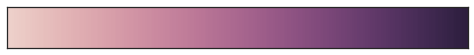

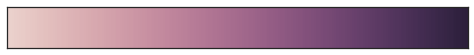

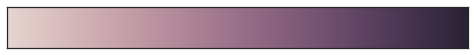

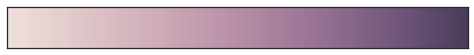

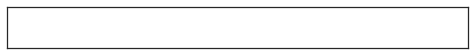

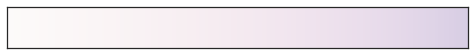

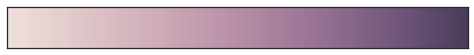

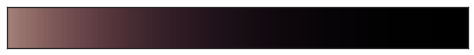

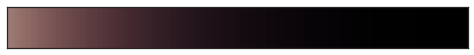

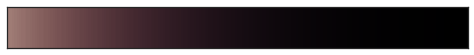

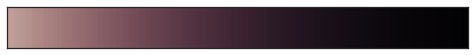

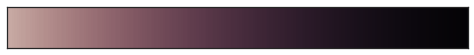

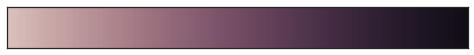

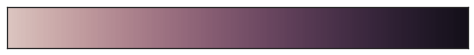

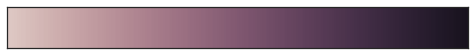

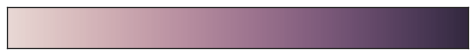

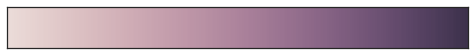

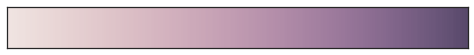

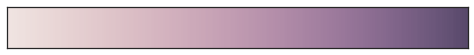

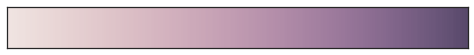

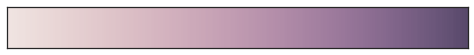

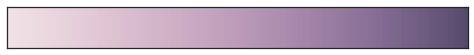

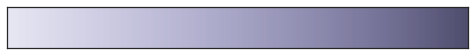

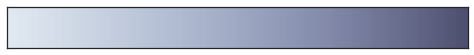

In [13]:
#Die Variable cmap kann danach Verwendet werden als Farbpalette
cmap = sns.choose_cubehelix_palette(as_cmap=True)

### Visualisierung von Paarweisen Beziehungen in einem Datensatz mittels Scatterplots und Histogrammen

Mit dem Pairplot wird ein Achsen Netz gebildet, bei dem die i-te Zeile die gleiche x-Achse und die j-te Spalte die gleiche y-Achse hat. Dies macht einen Vergleich zwischen verschiedenen Messungen mit einheitlicher Skala besser sichtbar. Dieser Plot eignet sich wenn Symmetrien in den Datensätzen Visualisiert werden sollen.

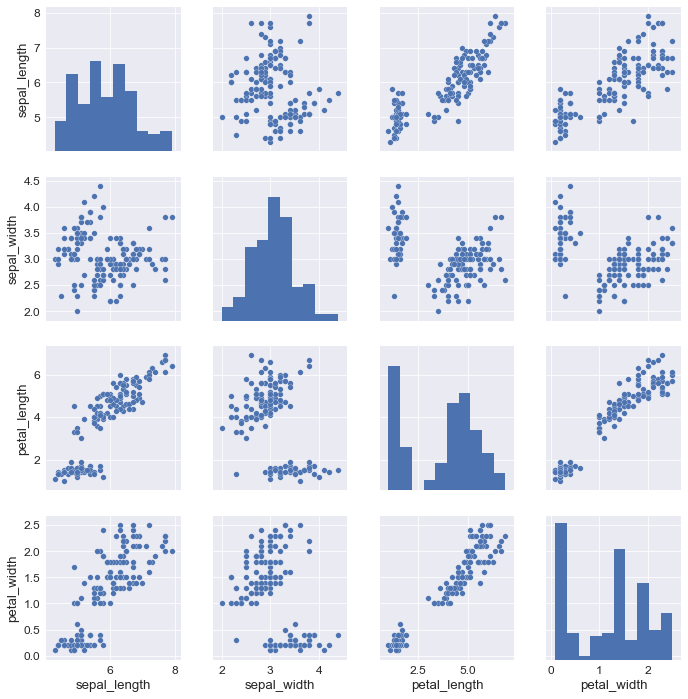

In [14]:
#Default Einstellungen
sns.set_context()
sns.set_context('paper',font_scale=1.5)

#Der iris Datensatz ist in der Bibliothek bereits vorhanden
iris = sns.load_dataset("iris")
# Sowohl für X als auch Y-Achse werden die Spalten des Dataframes benutzt
# In der Diagonalen wird die Wahrscheinlichkeitsverteilungen mittels Histogramm dargestellt.
sns.pairplot(iris);

### Teilmengen Betrachtung mit Facegrid

Der Facegrid Befehl ist nützlich, wenn Teilmengen in den Daten miteinander auf einheitlichen X und Y-Achsen verglichen werden sollen. Das heißt mittels Übergabeparametern (Spaltennamen des Dataframes) kann der Plot drei Dimensionen betrachten. Unterschieden wird nach: X,Y-Achse und Einfärbung. Der Unterschied zur pairplot Methode ist der, dass man nebeneinander gestellte Plots selbst pivotieren kann anhand der Übergabedaten. Wobei die Achsen bei den Plots gleich bleiben und somit durchweg Vergleichbar. 

Der Facegrid Plot ist am besten für den Use Case geeignet, wenn selektierte Daten gegenübergestellt werden sollen. Ein Beispiel könnte sein: Man möchte die Trinkgelder vom Mittagsessen mit denen beim Abendessen vergleichen. Dabei ist das Unterscheidungskriterium in diesem Fall die Zeit. Je nach Anzahl der Ausprägungen vom Unterscheidungskriterium entstehen N Plots.

Ein weiterer Vorteil der Facegrid Methode ist, dass sie direkt mit Dataframes arbeiten kann.

### Datensatz laden

In [15]:
#ist per Default vorhanden
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Vergleich zwischen Trinkgeld am Mittag und Abend

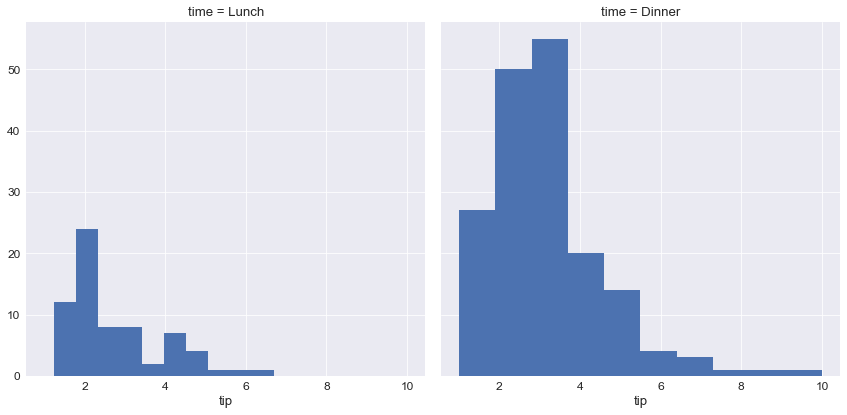

In [16]:
#col='time' legt eine Spalte fest für die Unterscheidung der Ausprägung der Variable "time" und
#bestimmt damit die Anzahl an Plots
#Mit Parameter size kann die Plotgröße angegeben werden
g = sns.FacetGrid(tips, col="time", size=6)
#X-Achse festlegen hier: "tip" = Trinkgeld
g.map(plt.hist, "tip");

### Vergleich: Zusammenhang zwischen Trinkgeld und Höhe der Rechnung bei Männern und Frauen

Zusätzlich unterscheidet die Farbe die Raucher von den Nichtrauchern

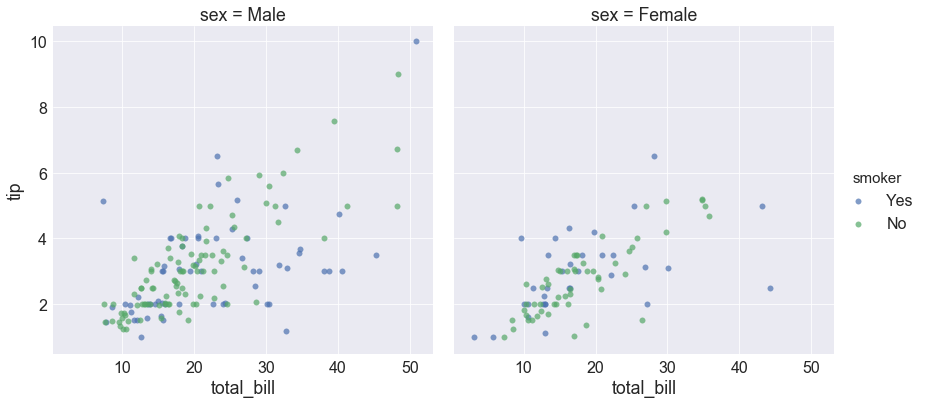

In [17]:
#Schriftögrße anpassen dazu wird in Seaborn der Kontext benötigt
sns.set_context('paper',font_scale=2)

#hue ist die Einfärbung, size die Plotgröße
g = sns.FacetGrid(tips, col="sex", hue="smoker", size=6)

#Parameter alpha für Transparenz
g.map(plt.scatter, "total_bill", "tip", alpha=.7)

#fügt Legende hinzu
g.add_legend();

### Vergleich: Zusammenhang zwischen Trinkgeld am Mittag und Abend und Rechnungshöhe mit Unterscheidung: Raucher in Verschiedenen Zeilen und Geschlecht in verschiedenen Farben

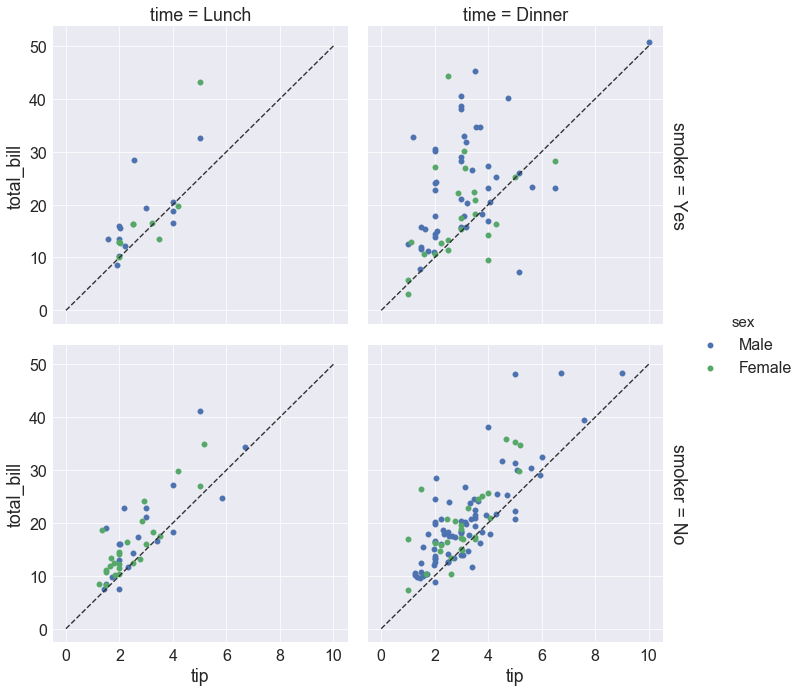

In [23]:
#Rows='smoker' gibt an das unterschiedliche Zeilen für die Plots zur Ausprägung der Variable "smoker" 
#genommen werden
#margin_titles=True bewirkt das die Legende "smoker" Vertikal ans Schaubild angelegt wird
g = sns.FacetGrid(tips, row="smoker", col="time", hue='sex',margin_titles=True, size=5)
g.map(plt.scatter, "tip", "total_bill");

#Erstellung einer Winkehalbierenden
for ax in g.axes.flat:
    ax.plot((0, 10), (0,50), c=".2", ls="--")
    
g.add_legend();

### Custom Funktionen innerhalb des Facegrid

Es ist möglich Funktionen zum Plotten anzugeben , die nicht per Default in Matplotlib bzw. Seaborn vorhanden sind. Wie z. B. ein Quantil Plot.

Dabei müssen folgende Regeln eingehalten werden:

- Es muss auf die vorhandenen matplitlib Achsen geplottet werden. 
- Die Daten müssen in richtiger Form übergeben werden (müssen intern in Serien transformiert bzw. übergeben werden)
- Die Keywords: `color` und `label` müssen intern akzeptiert werden. Dies Regelt Seaborn mit der Übergabe des Parameters `\**kwargs` an die custom Funktion unter der "Haube".

Vergleiche: http://seaborn.pydata.org/tutorial/axis_grids.html

Funktionen vom Modul `scipy` eigenen sich hierfür da sie Kompatibel mit der "Seaborn" API sind.

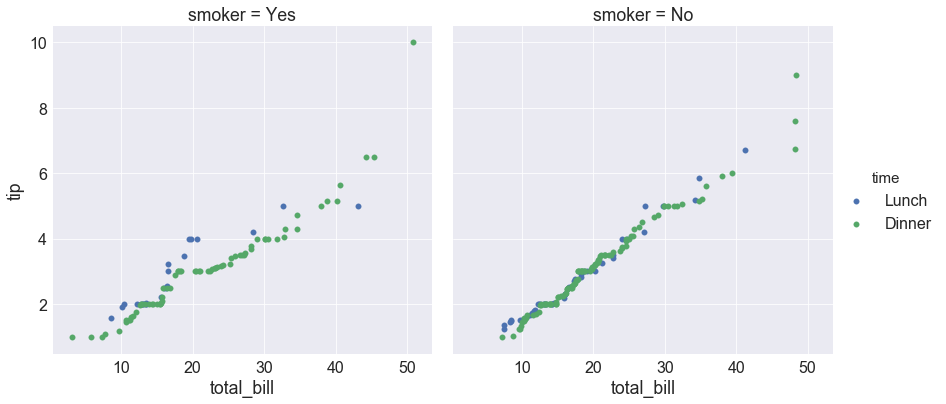

In [24]:
from scipy import stats

#Ein Quantil Plot aus dem Modul scipy
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)


#Spalten anhand der Merksmalsausprägungen für "smoker" festlegen
g = sns.FacetGrid(tips, col="smoker", hue='time', size=6)
#Aufruf der custom Funktion qqplot und Zuweisung des Plots an eine Variale
figure = g.map(qqplot, "total_bill", "tip");
g.add_legend();

### Plot exportieren als PNG und SVG

Wie im Theorieteil bereits erwähnt gehört zur CRISP-DM Phase Deployment auch das Verteilen der visualisierten Informationen. Dazu muss der Plot in der Regel in ein Format exportiert werden. Das folgende und abschließende Beispiel zeigt den Export eines Plots in eine PNG Datei und eine SVG Datei.

SVG = Scalable Vector Graphics siehe [skalierbare Vektorgrafik](https://de.wikipedia.org/wiki/Scalable_Vector_Graphics)

In [26]:
#vorher zugewiesene Variable zum Export als .PNG Datei verwenden.
figure.savefig("output.png")
#Export als SVG
figure.savefig("output.svg")

#### Weitere möglichkeiten

Seaborn ermöglicht noch viele weitere Plots wie z. B. Clustermaps oder Heatmaps

siehe: [Beispiel Gallerie](http://seaborn.pydata.org/examples/index.html)

#### Quellen

[BOS15]    Alberto Boschetti, Luca Massaron: Python Data Science Essentials (April 2014)<br>
[HEN11]    Alan Henry: http://lifehacker.com/5909501/how-to-choose-the-best-chart-for-your-data (November 2012)<br>
[HUN17]    John Hunter: https://matplotlib.org/users/intro.html (Mai 2017)<br>
[STA1]    Wolf Riepel: https://i0.wp.com/statistik-dresden.de/wp-content/uploads/2012/04/CRISP-DM_Process_Diagram1.png?w=479 (April 2012)<br> 
[STA2]    Wolf Riepel: http://statistik-dresden.de/archives/1128 (April 2012)<br> 
[WAS15]    Michael Waskom: http://seaborn.pydata.org/introduction.html (2015)<br>
[VAN15]    Jake VanderPlas: https://www.oreilly.com/learning/data-visualization-with-seaborn (Mai 2015)<br>
[SEA12]    Michael Waskom: http://seaborn.pydata.org/tutorial.html (Mai 2012 - 2015)